In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


## Input Data

In [2]:
df = pd.read_csv('../Dataset/clean_data.csv')
df.head(3)


,type,city,hotelFacilities,nearestPointOfInterests,starRating,size,originalRate,baseOccupancy,maxChildOccupancy,maxChildAge,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom,roomFacilities
0,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4,46.0,1227273,3,1,5,1,1,1,0,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."
1,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4,31.0,596694,2,1,5,0,1,1,0,"[""AIR_CONDITIONING"",""BATHROBES"",""BATHTUB"",""BLA..."
2,Hotel,Badung,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...","[{""landmarkId"":""91589773100576"",""geoId"":null,""...",4,52.0,1450413,2,1,5,1,1,1,1,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB..."


In [3]:
print(f'Total number of rows: {df.shape[0]}')
print(f'Total number of columns: {df.shape[1]}')


Total number of rows: 5046
Total number of columns: 15


In [4]:
# seperate the target variable
dfPrice = df[['originalRate']]
dfPrice.head(2)


,originalRate
0,1227273
1,596694


## Getting extraxcted features

### Extra Features Processing(one-hot encoding)

In [5]:
dfHotelEx = df.loc[:, ['originalRate', 'type', 'city', 'starRating']]
dfRoomEx = df.loc[:, ['originalRate', 'size', 'baseOccupancy', 'maxChildOccupancy',
                      'maxChildAge', 'isBreakfastIncluded', 'isWifiIncluded', 'isRefundable', 'hasLivingRoom']]
print(dfHotelEx.shape)
print(dfRoomEx.shape)

(5046, 4)
(5046, 9)


#### Hotel Extra Features

In [6]:
dfHotelEx.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5046 entries, 0 to 5045
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   originalRate  5046 non-null   int64 
 1   type          5046 non-null   object
 2   city          5046 non-null   object
 3   starRating    5046 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 157.8+ KB


In [7]:
dfHotelEx['city'].unique()


array(['Badung', 'Denpasar', 'Gianyar', 'Sanur', 'Bangli', 'Buleleng',
       'Klungkung', 'Tabanan', 'Jembrana', 'Karangasem'], dtype=object)

In [8]:
dfHotelEx['type'].unique()


array(['Hotel', 'Resor', 'Apartemen', 'Vila', 'Guest House', 'Homestay',
       'B&B', 'Hostel', 'Camping', 'Lainnya', 'Hotel Kapsul'],
      dtype=object)

In [9]:
cityEncode = pd.get_dummies(dfHotelEx['city'], prefix='City')
typeEncode = pd.get_dummies(dfHotelEx['type'], prefix='Type')
dfHotelEx = pd.concat([dfHotelEx, cityEncode, typeEncode], axis=1)


In [10]:
dfHotelEx.drop(['city', 'type'], axis=1, inplace=True)
print(dfHotelEx.shape)
dfHotelEx.sample(5)


(5046, 23)


,originalRate,starRating,City_Badung,City_Bangli,City_Buleleng,City_Denpasar,City_Gianyar,City_Jembrana,City_Karangasem,City_Klungkung,...,Type_B&B,Type_Camping,Type_Guest House,Type_Homestay,Type_Hostel,Type_Hotel,Type_Hotel Kapsul,Type_Lainnya,Type_Resor,Type_Vila
659,1700000,5,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2080,3174603,5,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4861,765197,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3334,2534435,5,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1499,495868,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
dfHotelEx.describe()


,originalRate,starRating,City_Badung,City_Bangli,City_Buleleng,City_Denpasar,City_Gianyar,City_Jembrana,City_Karangasem,City_Klungkung,...,Type_B&B,Type_Camping,Type_Guest House,Type_Homestay,Type_Hostel,Type_Hotel,Type_Hotel Kapsul,Type_Lainnya,Type_Resor,Type_Vila
count,5.046000e+03,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,...,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000
mean,1.316261e+06,3.359096,0.432422,0.010900,0.072136,0.047166,0.194610,0.012683,0.053310,0.101467,...,0.021007,0.002378,0.130400,0.052913,0.021007,0.476615,0.000793,0.001189,0.138129,0.139715
std,1.245768e+06,1.164159,0.495461,0.103841,0.258739,0.212015,0.395939,0.111915,0.224672,0.301975,...,0.143421,0.048713,0.336777,0.223882,0.143421,0.499502,0.028147,0.034466,0.345070,0.346725
min,4.031300e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.470560e+05,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.677690e+05,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.714831e+06,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,6.611571e+06,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Room Extra Features

In [12]:
dfRoomEx.head(2)


,originalRate,size,baseOccupancy,maxChildOccupancy,maxChildAge,isBreakfastIncluded,isWifiIncluded,isRefundable,hasLivingRoom
0,1227273,46.0,3,1,5,1,1,1,0
1,596694,31.0,2,1,5,0,1,1,0


### Feature Processing Function(multi-hot encoding)

In [13]:
# Hotel and Room facilities processing
# How to use : Facilities = getFacilities(df['Facilities'].tolist())
def getFacilities(facilitiesList):
    facilities = []
    for i in facilitiesList:
        m = int(i.count('"') / 2)
        for j in range(1, m+1, 2):
            temp = i.split('"')[j]
            if temp not in facilities:
                facilities.append(temp)
    return facilities


#### Getting the unique value

In [14]:
# Hotel Facilities to List
hotelFacilities = getFacilities(df['hotelFacilities'].tolist())
print(f' Total Unique Hotel Facilities: {len(hotelFacilities)}')


 Total Unique Hotel Facilities: 240


In [15]:
# Room Facilities to List
roomFacilities = getFacilities(df['roomFacilities'].tolist())
print(f' Total Unique Hotel Facilities: {len(roomFacilities)}')


 Total Unique Hotel Facilities: 110


In [16]:
# nearestPointOfInterests to List

landmark = df['nearestPointOfInterests'].to_list()
searchText = 'landmarkType'
nearestPoint = []

for x in range(len(landmark)):
    i = 0
    column = landmark[x].split('"')
    matched_indexes = []
    while i < len(column):
        if searchText == column[i]:
            matched_indexes.append(i)
        i += 1
    for y in matched_indexes:
        if column[y+2] not in nearestPoint:
            nearestPoint.append(column[y+2])
if 'OTHERS' in nearestPoint:
    nearestPoint.remove('OTHERS')

print(f' Total Unique Hotel Facilities: {len(nearestPoint)}')


 Total Unique Hotel Facilities: 19


In [17]:
# Create new dataframe
dfHotelEncode = pd.DataFrame(columns=hotelFacilities)
dfRoomEncode = pd.DataFrame(columns=roomFacilities)
dfPointEncode = pd.DataFrame(columns=nearestPoint)


In [18]:
# function to encode the facilities
def multihot_encode(df, column):
    dropRow = 0
    for i in range(len(df)):
        value = df[column][i]
        if value == '[]':
            df.drop([i], axis=0, inplace=True)
            dropRow += 1
            continue
        for j in range(2, len(df.columns)):
            column_name = df.columns[j]
            if column_name in value:
                df.loc[i, column_name] = 1
            else:
                df.loc[i, column_name] = 0
    print(df.shape)
    print(f'Number of rows dropped: {dropRow}')
    return df


#### Hotel Feature

In [19]:
dfHotel = pd.concat([df.pop('hotelFacilities'), dfHotelEncode], axis=1)
dfHotel = pd.concat([dfPrice, dfHotel], axis=1)
print(dfHotel.shape)
dfHotel.head(2)


(5046, 242)


,originalRate,hotelFacilities,CARPARK,ELEVATOR,HAS_24_HOUR_ROOM_SERVICE,RESTAURANT,RESTAURANT_FOR_BREAKFAST,RESTAURANT_FOR_DINNER,RESTAURANT_FOR_LUNCH,SAFETY_DEPOSIT_BOX,...,PETS_ALLOWED,SMALL_PETS_ALLOWED,WATER_PARK_ACCESS_SURCHARGE,PRIVATE_BEACH,SURFING,PRIVATE_BEACH_NEARBY,BEACH_SUN_LOUNGERS,DARTS,ENTERTAINMENT_PROGRAMME_FOR_CHILDREN,KARAOKE
0,1227273,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,596694,"[""CARPARK"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SERVIC...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# fill the NaN with 1 or 0
dfHotel = multihot_encode(dfHotel, 'hotelFacilities')
dfHotel.sample(3)


(4988, 242)
Number of rows dropped: 58


,originalRate,hotelFacilities,CARPARK,ELEVATOR,HAS_24_HOUR_ROOM_SERVICE,RESTAURANT,RESTAURANT_FOR_BREAKFAST,RESTAURANT_FOR_DINNER,RESTAURANT_FOR_LUNCH,SAFETY_DEPOSIT_BOX,...,PETS_ALLOWED,SMALL_PETS_ALLOWED,WATER_PARK_ACCESS_SURCHARGE,PRIVATE_BEACH,SURFING,PRIVATE_BEACH_NEARBY,BEACH_SUN_LOUNGERS,DARTS,ENTERTAINMENT_PROGRAMME_FOR_CHILDREN,KARAOKE
806,1962810,"[""COFFEE_SHOP"",""ELEVATOR"",""HAS_24_HOUR_ROOM_SE...",0,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1835,506887,"[""CARPARK"",""COFFEE_OR_TEA_IN_LOBBY"",""COFFEE_SH...",1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3632,4198805,"[""HAS_24_HOUR_ROOM_SERVICE"",""ROOM_SERVICE"",""CA...",1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Remove hotelFacilities column
dfHotel.drop('hotelFacilities', axis=1, inplace=True)


In [22]:
for i in range(1, len(dfHotel.columns)):
    dfHotel = dfHotel.astype({dfHotel.columns[i]: int})

#### Room Feature

In [23]:
dfRoom = pd.concat([df.pop('roomFacilities'), dfRoomEncode], axis=1)
dfRoom = pd.concat([dfPrice, dfRoom], axis=1)
print(dfRoom.shape)
dfRoom.head(2)


(5046, 112)


,originalRate,roomFacilities,AIR_CONDITIONING,BALCONY_TERRACE,BATHROBES,BATHTUB,BLACKOUT_DRAPES_CURTAINS,COFFEE_TEA_MAKER,COMPLIMENTARY_BOTTLED_WATER,DESK,...,ROLLAWAY_OR_EXTRA_BEDS,TABLET,YARD,VIDEO_GAMES,PORCH_OR_LANAI,IN_ROOM_SAFE_SURCHARGE,HOUSEKEEPING_ON_REQUEST,NO_HOUSEKEEPING,CHANGING_TABLE,MICROWAVE_SURCHARGE
0,1227273,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,596694,"[""AIR_CONDITIONING"",""BATHROBES"",""BATHTUB"",""BLA...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# fill the NaN with 1 or 0
dfRoom = multihot_encode(dfRoom, 'roomFacilities')
dfRoom.sample(3)

(4828, 112)
Number of rows dropped: 218


,originalRate,roomFacilities,AIR_CONDITIONING,BALCONY_TERRACE,BATHROBES,BATHTUB,BLACKOUT_DRAPES_CURTAINS,COFFEE_TEA_MAKER,COMPLIMENTARY_BOTTLED_WATER,DESK,...,ROLLAWAY_OR_EXTRA_BEDS,TABLET,YARD,VIDEO_GAMES,PORCH_OR_LANAI,IN_ROOM_SAFE_SURCHARGE,HOUSEKEEPING_ON_REQUEST,NO_HOUSEKEEPING,CHANGING_TABLE,MICROWAVE_SURCHARGE
3470,980596,"[""AIR_CONDITIONING"",""BALCONY_TERRACE"",""BATHROB...",1,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
500,1115702,"[""AIR_CONDITIONING"",""BATHROBES"",""BLACKOUT_DRAP...",1,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1520,868780,"[""AIR_CONDITIONING"",""BLACKOUT_DRAPES_CURTAINS""...",1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Remove roomFacilities column
dfRoom.drop('roomFacilities', axis=1, inplace=True)


In [26]:
for i in range(1, len(dfRoom.columns)):
    dfRoom = dfRoom.astype({dfRoom.columns[i]: int})

#### Point of Interest Feature

In [27]:
dfPoint = pd.concat([df.pop('nearestPointOfInterests'), dfPointEncode], axis=1)
dfPoint = pd.concat([dfPrice, dfPoint], axis=1)
dfPoint.head(2)


,originalRate,nearestPointOfInterests,SHOPPING_AREA,OFFICIAL_BUILDING,RESTAURANT,ATTRACTION,BEACH,MONUMENT,TERMINAL,PARK,...,MUSEUM,GALLERY,PLACE_OF_WORSHIP,TRAIN_STATION,ZOO,ENTERTAINMENT,GARDEN,THEATER,STORE,SCHOOL
0,1227273,"[{""landmarkId"":""91589773100576"",""geoId"":null,""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,596694,"[{""landmarkId"":""91589773100576"",""geoId"":null,""...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# fill the NaN with 1 or 0
dfPoint = multihot_encode(dfPoint, 'nearestPointOfInterests')
dfPoint.sample(3)

(5030, 21)
Number of rows dropped: 16


,originalRate,nearestPointOfInterests,SHOPPING_AREA,OFFICIAL_BUILDING,RESTAURANT,ATTRACTION,BEACH,MONUMENT,TERMINAL,PARK,...,MUSEUM,GALLERY,PLACE_OF_WORSHIP,TRAIN_STATION,ZOO,ENTERTAINMENT,GARDEN,THEATER,STORE,SCHOOL
3458,550964,"[{""landmarkId"":""91542085107116"",""geoId"":null,""...",0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3305,305455,"[{""landmarkId"":""91589773100576"",""geoId"":null,""...",1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1432,206612,"[{""landmarkId"":""91523586891511"",""geoId"":null,""...",1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Remove nearestPointOfInterests column
dfPoint.drop('nearestPointOfInterests', axis=1, inplace=True)


In [30]:
# Convert to int
for i in range(1, len(dfPoint.columns)):
    dfPoint = dfPoint.astype({dfPoint.columns[i]: int})

#### Add Prefix

In [31]:
dfHotel = dfHotel.add_prefix('Hotel_')
dfRoom = dfRoom.add_prefix('Room_')
dfPoint = dfPoint.add_prefix('Point_')


In [32]:
dfHotel.sample(3)

,Hotel_originalRate,Hotel_CARPARK,Hotel_ELEVATOR,Hotel_HAS_24_HOUR_ROOM_SERVICE,Hotel_RESTAURANT,Hotel_RESTAURANT_FOR_BREAKFAST,Hotel_RESTAURANT_FOR_DINNER,Hotel_RESTAURANT_FOR_LUNCH,Hotel_SAFETY_DEPOSIT_BOX,Hotel_WIFI_PUBLIC_AREA,...,Hotel_PETS_ALLOWED,Hotel_SMALL_PETS_ALLOWED,Hotel_WATER_PARK_ACCESS_SURCHARGE,Hotel_PRIVATE_BEACH,Hotel_SURFING,Hotel_PRIVATE_BEACH_NEARBY,Hotel_BEACH_SUN_LOUNGERS,Hotel_DARTS,Hotel_ENTERTAINMENT_PROGRAMME_FOR_CHILDREN,Hotel_KARAOKE
1230,1570248,1,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4929,2826446,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4224,851047,1,0,0,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0


In [33]:
dfRoom.sample(3)

,Room_originalRate,Room_AIR_CONDITIONING,Room_BALCONY_TERRACE,Room_BATHROBES,Room_BATHTUB,Room_BLACKOUT_DRAPES_CURTAINS,Room_COFFEE_TEA_MAKER,Room_COMPLIMENTARY_BOTTLED_WATER,Room_DESK,Room_DVD_PLAYER,...,Room_ROLLAWAY_OR_EXTRA_BEDS,Room_TABLET,Room_YARD,Room_VIDEO_GAMES,Room_PORCH_OR_LANAI,Room_IN_ROOM_SAFE_SURCHARGE,Room_HOUSEKEEPING_ON_REQUEST,Room_NO_HOUSEKEEPING,Room_CHANGING_TABLE,Room_MICROWAVE_SURCHARGE
2536,528000,1,1,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2901,275483,1,1,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1396,3964528,1,0,1,1,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [34]:
dfPoint.sample(3)

,Point_originalRate,Point_SHOPPING_AREA,Point_OFFICIAL_BUILDING,Point_RESTAURANT,Point_ATTRACTION,Point_BEACH,Point_MONUMENT,Point_TERMINAL,Point_PARK,Point_HOSPITAL,Point_MUSEUM,Point_GALLERY,Point_PLACE_OF_WORSHIP,Point_TRAIN_STATION,Point_ZOO,Point_ENTERTAINMENT,Point_GARDEN,Point_THEATER,Point_STORE,Point_SCHOOL
1763,377686,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3228,1280992,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1439,545455,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Feature Selection

### Function

In [35]:
# create funtion to get the mean value of the columns and add to the dataframe
def getMean(df):
    dfMean = pd.DataFrame(columns=['Mean'])
    for i in range(1, len(df.columns)):
        dfMean.loc[i-1] = df[df.columns[i]].mean()
    dfMean.index = df.columns[1:]
    dfMean = dfMean.reset_index(drop=False)
    dfMean.columns = ['Facilities', 'Mean']
    return dfMean

In [36]:
# create function to remove outlier from data frame using IQR baesd on the mean value of the columns
def featureSelection(dfFunction):
    dfMean = getMean(dfFunction)
    initialLength = len(dfMean)
    q1 = dfMean['Mean'].quantile(0.25)
    q3 = dfMean['Mean'].quantile(0.75)
    iqr = q3 - q1

    # create list of facilities that will be removed then drop it from the dataframe (df)
    removedFacilities = []
    for i in range(len(dfMean)):
        if dfMean['Mean'][i] >= (q3 + 1.5 * iqr) or dfMean['Mean'][i] <= (q1 - 1.5 * iqr):
            removedFacilities.append(dfMean.loc[i, 'Facilities'])
    df = dfFunction.drop(removedFacilities, axis=1)

    # create new dataframe that will be used to store the cleaned data
    dfClean = dfMean[~dfMean['Facilities'].isin(removedFacilities)]
    print(f"Null value : {dfClean.isnull().sum().any()}")

    # calculate the number of facilities that will be removed
    print(f'Final Number of Features: {len(dfClean)}')
    calRemovedFacilities = initialLength - len(dfClean)
    print(f'Number of Facilities Removed: {calRemovedFacilities}')

    # print the q1, q3, and iqr
    print(f'Q1: {q1}')
    print(f'Q3: {q3}')
    print(f'IQR: {iqr}')

    return dfClean, df

In [37]:
# create function to make histplot of the dataframe clomuns mean
def getHist(df, title):
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x='Mean', kde=True, bins=50)
    plt.title(f'{title} Facilities')
    plt.show()


### Hotel, Room, and Point of Interest Features

#### Hotel Features

In [38]:
dfMeanHotel = getMean(dfHotel)
dfMeanRooom = getMean(dfRoom)
dfMeanPoint = getMean(dfPoint)


In [39]:
dfMeanHotel.describe().T


,count,mean,std,min,25%,50%,75%,max
Mean,240.0,0.17443,0.209893,0.000802,0.024509,0.085004,0.236919,0.865678


In [40]:
dfMeanHotel, dfHotel = featureSelection(dfHotel)
dfMeanHotel

Null value : False
Final Number of Features: 216
Number of Facilities Removed: 24
Q1: 0.024508821170809943
Q3: 0.23691860465116277
IQR: 0.21240978348035283


,Facilities,Mean
1,Hotel_ELEVATOR,0.193264
2,Hotel_HAS_24_HOUR_ROOM_SERVICE,0.195670
4,Hotel_RESTAURANT_FOR_BREAKFAST,0.385124
5,Hotel_RESTAURANT_FOR_DINNER,0.318565
6,Hotel_RESTAURANT_FOR_LUNCH,0.323376
...,...,...
235,Hotel_PRIVATE_BEACH_NEARBY,0.022253
236,Hotel_BEACH_SUN_LOUNGERS,0.050120
237,Hotel_DARTS,0.010225
238,Hotel_ENTERTAINMENT_PROGRAMME_FOR_CHILDREN,0.012229


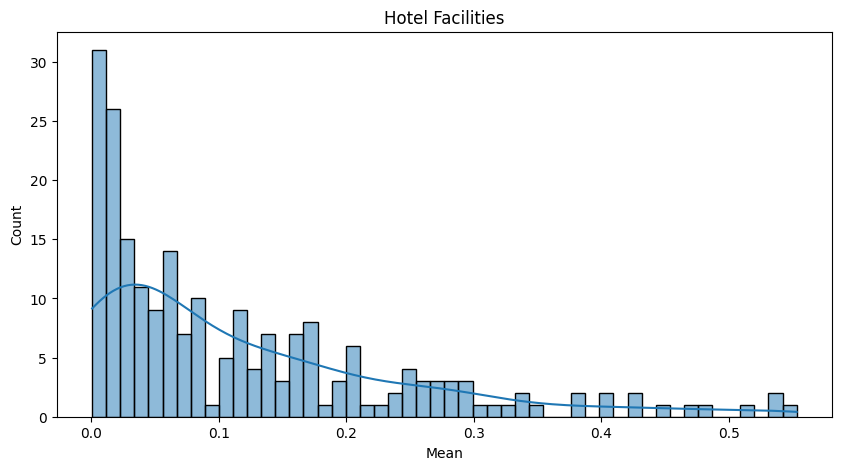

In [41]:
getHist(dfMeanHotel, 'Hotel')


#### Room Features

In [42]:
dfMeanRooom.describe().T


,count,mean,std,min,25%,50%,75%,max
Mean,110.0,0.136243,0.218848,0.000207,0.006266,0.037593,0.122877,0.943869


In [43]:
dfMeanRooom, dfRoom = featureSelection(dfRoom)
dfMeanRooom

Null value : False
Final Number of Features: 93
Number of Facilities Removed: 17
Q1: 0.006265534382767192
Q3: 0.12287696768848384
IQR: 0.11661143330571665


,Facilities,Mean
2,Room_BATHROBES,0.219967
3,Room_BATHTUB,0.229495
4,Room_BLACKOUT_DRAPES_CURTAINS,0.286040
8,Room_DVD_PLAYER,0.091549
9,Room_FREE_NEWSPAPER,0.018020
...,...,...
105,Room_IN_ROOM_SAFE_SURCHARGE,0.000414
106,Room_HOUSEKEEPING_ON_REQUEST,0.008699
107,Room_NO_HOUSEKEEPING,0.002693
108,Room_CHANGING_TABLE,0.000621


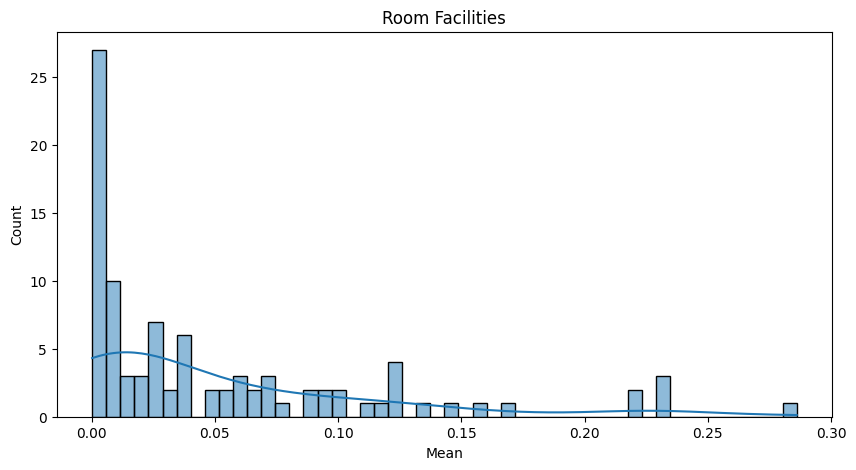

In [44]:
getHist(dfMeanRooom, 'Room')


#### Point of Interest Features

In [45]:
dfMeanPoint.describe().T


,count,mean,std,min,25%,50%,75%,max
Mean,19.0,0.195197,0.242936,0.000199,0.004175,0.02664,0.337575,0.691252


In [46]:
dfMeanPoint, dfPoint = featureSelection(dfPoint)
dfMeanPoint

Null value : False
Final Number of Features: 19
Number of Facilities Removed: 0
Q1: 0.004174950298210736
Q3: 0.33757455268389663
IQR: 0.3333996023856859


,Facilities,Mean
0,Point_SHOPPING_AREA,0.645129
1,Point_OFFICIAL_BUILDING,0.296620
2,Point_RESTAURANT,0.691252
3,Point_ATTRACTION,0.579324
4,Point_BEACH,0.326044
5,Point_MONUMENT,0.364414
6,Point_TERMINAL,0.349105
7,Point_PARK,0.323459
8,Point_HOSPITAL,0.019483
9,Point_MUSEUM,0.021670


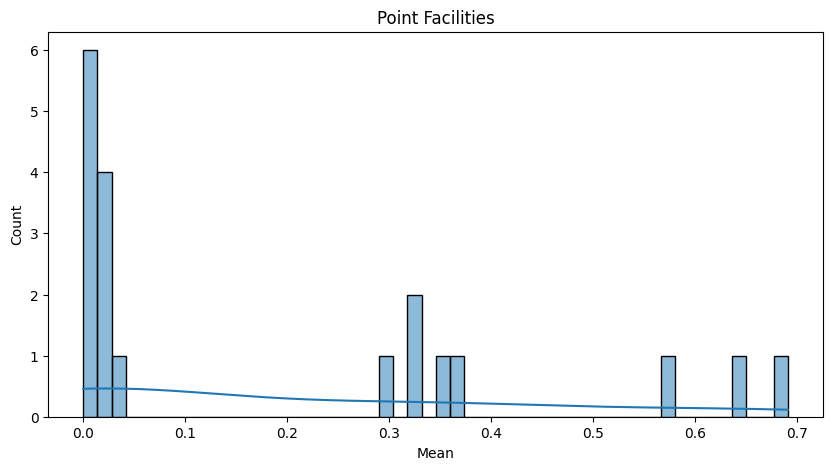

In [47]:
getHist(dfMeanPoint, 'Point')


In [48]:
hotelFacilities = dfHotel.drop(dfHotel.columns[0], axis=1)
roomFacilities = dfRoom.drop(dfRoom.columns[0], axis=1)
nearestPointOfInterests = dfPoint.drop(dfPoint.columns[0], axis=1)

hotelFacilities = hotelFacilities.columns
roomFacilities = roomFacilities.columns
nearestPointOfInterests = nearestPointOfInterests.columns


In [49]:
dfHotel.head()


,Hotel_originalRate,Hotel_ELEVATOR,Hotel_HAS_24_HOUR_ROOM_SERVICE,Hotel_RESTAURANT_FOR_BREAKFAST,Hotel_RESTAURANT_FOR_DINNER,Hotel_RESTAURANT_FOR_LUNCH,Hotel_BUSINESS_CENTER,Hotel_MEETING_FACILITIES,Hotel_PHOTOCOPIER,Hotel_LAN_INTERNET_ACCESS,...,Hotel_PETS_ALLOWED,Hotel_SMALL_PETS_ALLOWED,Hotel_WATER_PARK_ACCESS_SURCHARGE,Hotel_PRIVATE_BEACH,Hotel_SURFING,Hotel_PRIVATE_BEACH_NEARBY,Hotel_BEACH_SUN_LOUNGERS,Hotel_DARTS,Hotel_ENTERTAINMENT_PROGRAMME_FOR_CHILDREN,Hotel_KARAOKE
0,1227273,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,596694,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1450413,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,855372,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,2545455,1,1,1,1,1,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0


In [50]:
# export hotelFacilities, roomFacilities, nearestPointOfInterests list to another notebook
with open('../Notebook/Variable/hotelFacilities.pkl', 'wb') as f:
    pickle.dump(hotelFacilities, f)
with open('../Notebook/Variable/roomFacilities.pkl', 'wb') as f:
    pickle.dump(roomFacilities, f)
with open('../Notebook/Variable/nearestPointOfInterests.pkl', 'wb') as f:
    pickle.dump(nearestPointOfInterests, f)


## Combine Dataframe

In [51]:
dfRoom.drop('Room_originalRate', axis=1, inplace=True)
dfHotel.drop('Hotel_originalRate', axis=1, inplace=True)
dfPoint.drop('Point_originalRate', axis=1, inplace=True)
dfHotelEx.drop('originalRate', axis=1, inplace=True)
dfRoomEx.drop('originalRate', axis=1, inplace=True)
df = df[['originalRate']]

In [52]:
combine = [df,  dfRoomEx, dfHotelEx, dfRoom, dfHotel, dfPoint]
df = pd.concat(combine, axis=1)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


In [53]:
# Check if there is any duplicate column
for i in range(0, len(df.columns)):
    for j in range(i+1, len(df.columns)):
        if df.columns[i] == df.columns[j]:
            print(df.columns[i])

In [54]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4767 entries, 0 to 4766
Columns: 359 entries, originalRate to Point_SCHOOL
dtypes: float64(329), int64(9), uint8(21)
memory usage: 12.4 MB


## Export Data

In [55]:
df.to_csv('../Dataset/encoded_data.csv', index=False)


In [56]:
col = df.columns
# export col to another notebook
with open('../Notebook/Variable/col.pkl', 'wb') as f:
    pickle.dump(col, f)


# Data Analysis

In [57]:
# create visualization into 1 chart
def createVisualization(df, colName, color):
    # create new dataframe with input prefix column name
    dfNew = pd.DataFrame()
    for i in range(1, len(df.columns)):
        if df.columns[i].startswith(f'{colName}'):
            dfNew[df.columns[i]] = df[df.columns[i]]
    # make table with only the column name and sum of value
    dfNew = dfNew.sum().to_frame()
    dfNew.reset_index(inplace=True)
    dfNew.columns = ['column', 'value']
    # change value data type to int
    dfNew['value'] = dfNew['value'].astype(int)
    # sort value
    dfNew = dfNew.sort_values(by='value', ascending=False)
    print(dfNew.head(10))
    # create barchart to visualize the data with sorted value and horizontal with tight gap and annotate the value on top of each bar
    plt.figure(figsize=(8.5, 5))
    sns.barplot(x='value', y='column', data=dfNew.head(
        10), orient='h', color=color, errorbar=None, )
    # plt.tight_layout()
    # annotate the value on top of each bar using seaborn annotation
    for i, v in enumerate(dfNew['value'].head(10)):
        plt.text(v+10, i, str(v), color='black', fontweight=300, fontsize=8)
    plt.show()

            column  value
0      City_Badung   2061
4     City_Gianyar    939
7   City_Klungkung    470
2    City_Buleleng    339
6  City_Karangasem    261
8       City_Sanur    238
3    City_Denpasar    224
9     City_Tabanan    124
5    City_Jembrana     59
1      City_Bangli     52


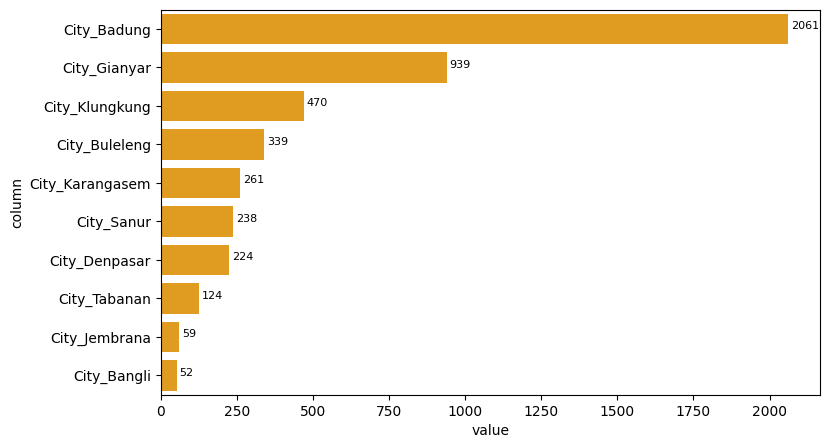

In [58]:
createVisualization(df, 'City', 'orange')


               column  value
6          Type_Hotel   2286
10          Type_Vila    660
9          Type_Resor    659
3    Type_Guest House    619
4       Type_Homestay    248
1            Type_B&B    103
5         Type_Hostel    102
0      Type_Apartemen     74
2        Type_Camping     11
7   Type_Hotel Kapsul      4


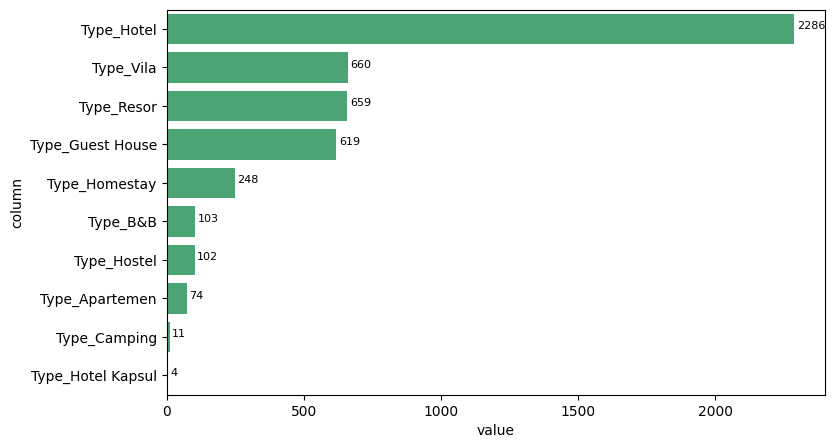

In [59]:
createVisualization(df, 'Type', 'mediumseagreen')


                     column  value
2          Point_RESTAURANT   3310
0       Point_SHOPPING_AREA   3059
3          Point_ATTRACTION   2757
5            Point_MONUMENT   1747
6            Point_TERMINAL   1675
7                Point_PARK   1558
4               Point_BEACH   1551
1   Point_OFFICIAL_BUILDING   1406
10            Point_GALLERY    152
12      Point_TRAIN_STATION    125


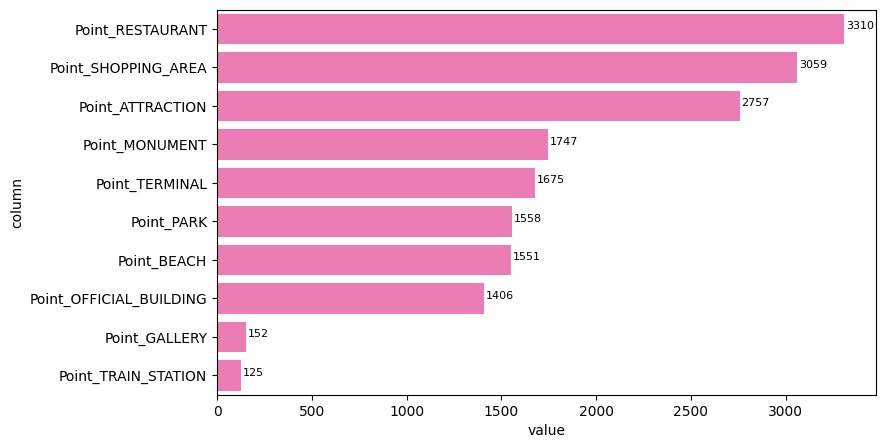

In [60]:
createVisualization(df, 'Point', 'hotpink')
